<a href="https://colab.research.google.com/github/Swapnadeepgit/Timeseries-Forecating/blob/main/timeseriesforecastingVAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vector autoregression (VAR) is a statistical model that describes how multiple variables change over time. It's a type of stochastic process model that's often used to forecast economic and financial time series**

In [51]:
#importing all necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [8]:
#importing the dataset
data=pd.read_csv('/content/Raotbl6.csv',parse_dates=['date'],index_col='date')
data.shape
data.head()

,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


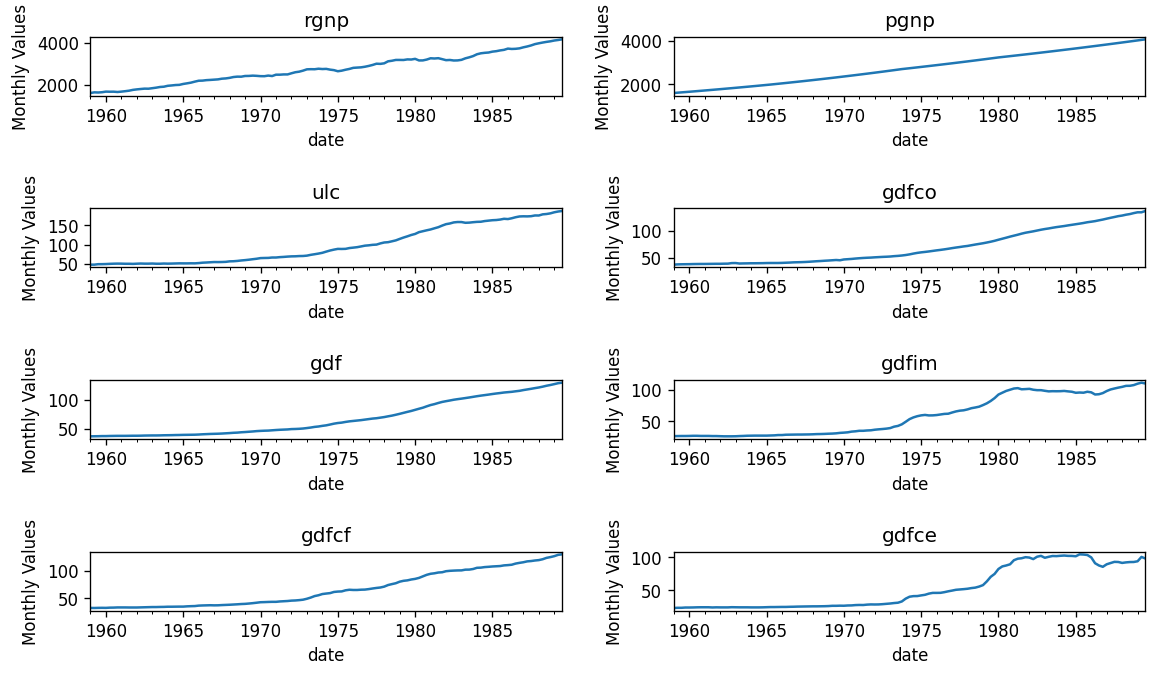

In [10]:
#creating the plots of every column    to get the graphical overview of the data
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120,figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data.iloc[:,i].plot(ax=ax, title=data.columns[i])
    ax.set_ylabel('Monthly Values')
plt.tight_layout(pad=2)
plt.show()


In [14]:
#checking for stationarity in data by augmented dicky fuller test over tepw columns
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(data['rgnp'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: 0.6418816546694834
p-value: 0.9886037114305949


In [15]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(data['ulc'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: 1.3967161828616623
p-value: 0.9970991728829679


As the p-value for the both columns are more than 0.5 so the data is not stationary , hence it is required to convert the data to stationary


In [16]:
#differencing the data to make it stationary
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(data['rgnp'].diff()[1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
ad_fuller_result = adfuller(data['ulc'].diff()[1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')



ADF Statistic: -5.427594381007333
p-value: 2.9633019848469254e-06
ADF Statistic: -3.576080473150911
p-value: 0.006235131830238172


In [20]:
#checking the correlation of the two time series (two selected coloumn)
# grangercausalitytests test
from statsmodels.tsa.stattools import grangercausalitytests
print('ulc causes rgnp??')#hypothesis 1
g1=grangercausalitytests(data[['rgnp','ulc']], maxlag=4)
print('rgnp causes ulc??')#hypothesis 2
g2=grangercausalitytests(data[['ulc','rgnp']], maxlag=4)


ulc causes rgnp??

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.3823  , p=0.5364  , df=1
likelihood ratio test: chi2=0.3817  , p=0.5367  , df=1
parameter F test:         F=0.3729  , p=0.5426  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6201  , p=0.0117  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=9.6386  , p=0.0081  , df=2
likelihood ratio test: chi2=9.2739  , p=0.0097  , df=2
parameter F test:         F=4.6201  , p=0.0117  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.0976  , p=0.0084  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=13.0544 , p=0.0045  , df=3
likelihood ratio test: chi2=12.3920 , p=0.0062  , df=3
parameter F test:         F=4.0976  , p=0.0084  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.

In [21]:
data=data[['ulc','rgnp']]
print(data.shape)

(123, 2)


In [44]:
#dividing data into train and test
#last 12 values in the training part
train=data.iloc[:-12]
test=data.iloc[-12:]

In [45]:
from statsmodels.tsa.api import VAR
model=VAR(train.diff()[1:])


In [35]:
sorted_order=model.select_order(maxlags=12)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.767       6.820       868.8       6.788
1        5.900      6.058*       364.9       5.964
2        5.840       6.103       343.7       5.946
3        5.808       6.177       333.0       5.957
4       5.668*       6.142      289.7*      5.860*
5        5.738       6.319       311.1       5.973
6        5.682       6.368       294.5       5.960
7        5.746       6.537       314.4       6.066
8        5.742       6.639       314.0       6.105
9        5.790       6.792       330.3       6.195
10       5.786       6.894       330.2       6.234
11       5.794       7.007       334.1       6.284
12       5.757       7.076       323.7       6.290
--------------------------------------------------


In [46]:
var_model = VARMAX(train,order=(4,0), enforce_stationarity= True)
fitted_model = var_model.fit(disp = False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11921.099
                          + intercept   AIC                          23884.199
Date:                Wed, 22 Jan 2025   BIC                          23941.099
Time:                        18:30:02   HQIC                         23907.281
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          31.87, 106.12   Jarque-Bera (JB):         35.34, 13.90
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.15, 0.28   Skew:                      0.87, -0.86
Prob(H) (two-sided):            0.67,

In [63]:
from statsmodels.tsa.statespace.varmax import VARMAX
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train), end=len(train)+n_forecast-1)
predictions = predict.predicted_mean


In [64]:
predictions.columns=['ulc_predictions','rgnp_predictions']
predictions

,ulc_predictions,rgnp_predictions
1986-10-01,165.564535,3559.177461
1987-01-01,248.418487,3756.122324
1987-04-01,43.628907,3545.833958
1987-07-01,272.489880,3868.327199
1987-10-01,144.936262,3463.983473
1988-01-01,175.023548,3773.322539
1988-04-01,149.785231,3619.629606
1988-07-01,212.615794,3737.268347
1988-10-01,141.111073,3552.072964
1989-01-01,199.736244,3771.625288


<Axes: >

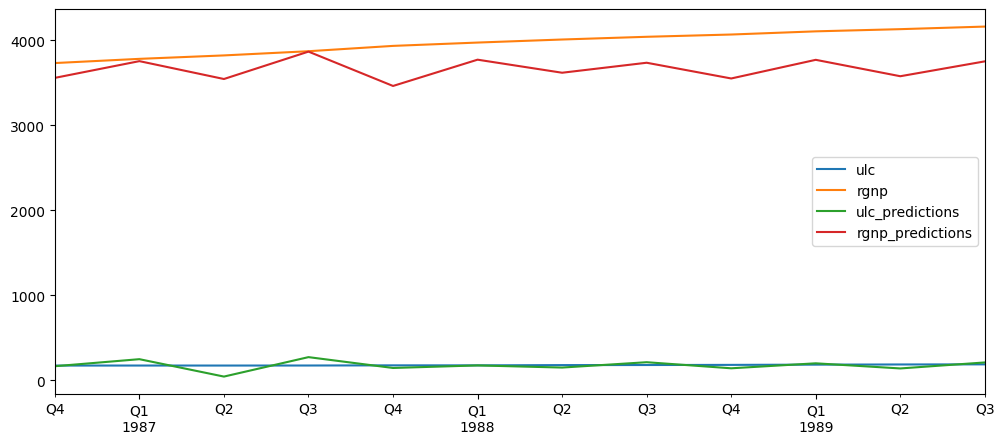

In [65]:
test_vs_pred=pd.concat([test,predictions],axis=1)
test_vs_pred.plot(figsize=(12,5))

In [66]:
#checking the mean squared error
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
from statsmodels.tools.eval_measures import rmse
mse=mean_squared_error(test,predictions)
print(mse)

62982.87108957628
